# Loss and Metric
## Loss
학습할 때 가중치를 업데이트 하기 위해 구하는 비용함수(손실함수, 에러함수)로 미분 가능하여 학습 오차가
줄어드는 방향을 제시하는 함수
## 지표(Metric)
테스트 데이터를 이용해서 모델을 평가할 때 쓰는 함수로 정밀도, 재현율(==민감도), 정확도, F-Score 등등 다양한 지표들이 있다.  
MSE같은 경우는 Loss와 Metric에 둘다 쓰일 수 있으나 정확도 같은 경우는 결과가 맞다 틀리다로 나타나는 이산적인 값이기 때문에  
Metric이 모델 성능을 평가한다고 해서 이를 Loss에 적용시킬 수는 없다. 연속적인 수를 가지면서 예측결과가 좋아지는 방향으로  안내할 수가 없기 때문이다. 예를 들어 신뢰도가 0.8, 0.6, 0.9 세가지 결과를 내는 모델이 왔을 때 각각 오차는 0.2, 0.4, 0.1로   계산할 수 있지만 분류문제일 경우 정확도가 100%가 떠버리기 때문에 모델이 좋아지는 방향을 제시할 수 없다. 

### 정밀도(Precision)와 재현율(Recall 또는 Sensitivity)
둘의 관계는 서로 반비례 관계에 있다. 그래서 조화롭게 반영을 하려면 두 점수의 조화평균을 구해야한다.(확률값이므로)  
이 둘의 조화평균을 가지고 만든 지표를 F-Score라고 한다.  
$$F_{\beta} = (1 + \beta^2)  \cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall}$$
둘의 관계가 반비례 관계 있다는 얘기는 혼동행렬의 잘못된 측정에 해당하는 FP와 FN에 따라 알맞은 지표를 써야 함을 의미한다.  
## 정밀도(Precision)
정밀도는 FP와 TP 케이스 중 TP의 비율을 구하는 것으로 우리가 탐지해내려고 하는 것을 모델이 찾은것 중에 진짜  
맞게 찾은게 얼마나 되는지를 본다.  
$$\frac{TP}{FP + TP}$$
정밀도의 경우 FP가 중요할 때 써야 한다. 예를 들어 스팸 메일을 분류하려고 할 때 예측의 결과에 따라  
아래 네가지 경우가 있을 수 있는데  
* TP: 스팸 메일을 스팸이라 답함
* TN: 스팸이 아닌것을 스팸이 아니다 라고 답함
* FP: 스팸 아닌데 맞다고 함
* FN: 스팸인데 스팸 아니라고 함

스팸이 아닌데 결제나 라이센스 메일같이 중요한걸 정크폴더에 넣으면 큰일 나는데 비해 스팸이 일반 편지함에 들어오는 것은 상대적으로 큰 일이 아니므로 이는 용인할 만한 일이다. 너무 FN을 무시하면 분류기로써 못쓰겠다만.

## 재현율(Recall 또는 Sensitivity)
민감도라고도 불리는 재현율은 다음과 같이 계산한다. 
$$recall = \frac{TP}{TP + FN}$$
민감도는 탐지할 대상(정답들) 중에 모델이 알맞게 맞춘 것을 의미한다.
재현율에서는 분모에 FN이 들어가므로 FP보다 FN이 중요한 경우, 예를 들면 암환자 진단에서 
* FP: 암환자 아닌데 맞다고 함
* FN: 암환자 맞는데 아니라고 함!!!!
FP의 경우 다른 검사를 통해서 아니라고 밝혀지거나 얼렁뚱땅 이상한 진료를 받으면서 살 수는 있겠으나  
FN의 경우는 암치료를 받아야 되는데 못 받아서 죽을 수가 있다.

# PR-Curve and ROC Curve
## PR-Curve
Precision Recall은 내가 예측 결과에 얼만큼의 임계값을 주느냐에 따라서 값이 달라질 수 있다. 
예를 들어 1.0 만점에 0.2 정도로 이상인 값들만 유효한 결과라고 생각하고 오차를 내서 모델 성능을 평가할 수 도 있다.  
즉 주관적인 임계값에 따라 전체 성능이 변할 수 있으므로 다양한 임계값에 따른 Precision과 Recall을 같이 반영해주는 지표를 만들 필요가 있는데 그게 PR-Curve이다.
말 그대로 임계값을 변화시켜갈 때마다 달라지는 Precion과 Recall 값을 그래프로 그린 뒤 이들이 이루는 면적을 점수로 사용하는 것이다.

아래 기본제공되는 sklearn의 iris 데이터를 이용해 PR Curve를 그려보려고 한다.

보다 시피 decision_function을 통해 해당 클래스에 속할 확률을 threshold로 걸러내주면, 그에 따라
Precision과 Recall값이 달라진다. 
예를 들어
0.8, 0.81, 0.79 이렇게 나왔을 때 기준값을 0.9로 잡아버리면 이 행은 정답이 없다.

In [17]:
from sklearn.metrics import confusion_matrix, classification_report


for threshold in [-0.1, 1.0, 2.0]:
   y_prob =  classifier.decision_function(X_test) > threshold
   mat = confusion_matrix(y_test, y_prob)
   print(mat)
   print(classification_report(y_test, y_prob))

[[22  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[22  0]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        28

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[22  0]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.89      0.94        28

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg     

아래처럼 PR 곡선을 그려보면 너무 지나치게 이상적인 그래프를 보여주고 있는데 실제로는 보통 계단 모양으로 찌그러진 다각형 모양의  그래프가 나오게 된다. 그래서 최대한 이상적인 Precision과 Recall 모두가 1에 가까운지는 이들이 이루고 있는 커브 곡선의 면적을 구하면 좋은 지표가 될 수 있는 것이다.

1.0


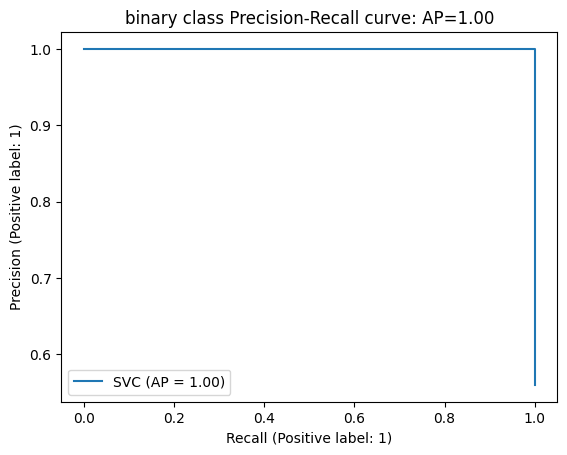

In [20]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(X_test)
print(average_precision_score(y_test, y_pred))
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

그래서 PR-Curve는 이산 데이터로 면적을 구하므로 아래와 같이 표현될 수 있다. 
$$AUC = \sum_{n}^{m}{(R_n - R_{n - 1})}P_n$$

## ROC(Receiver Operating Characteristic Curve)
![label](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/220px-Roc_curve.svg.png)
AUC와 비슷하게 곡선 아래 면적으로 성능을 나타내는 것인데 이번에는 x와 y로 쓰일 값이 정밀도와 재현율이 아닌
FPR과 TPR로 그리는 것이 다르다.
TPR은 아래와 같은 수식으로 재현율이 되고
$$TPR = \frac{TP}{TP + FN}$$
FPR은 아래와 같은 수식으로 반대 방향으로 재현율이 된다.
즉 스팸에서는 스팸인 것이 True였는데 이와 반대로 정상 메일을 기준으로 재현율을 구한 것이다
$$FPR = \frac{FP}{TN + FP}$$

1.0


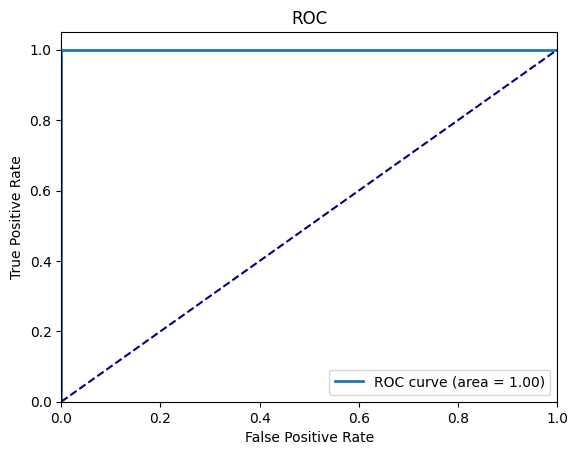

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr,  lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.legend(loc="lower right")
plt.show()

모델이 틀린 대답을 한 비율인 FPR보다 TPR이 높으면 좋으므로 그래프가 y=1에 가깝게 그려질 수록 좋다.  
보통은 활꼴로 그려지는데 분류를 잘할 수록 현의 모양이 직각에 붙어가게 된다.
y=x를 기준으로 위에 있으면 TPR이 높다는 의미이므로 모델 성능이 좋지만 y=x 에 가까울 수록 
FPR값이 크다는 말이므로 암환자가 아닌데 암환자라고 대답하는 비율이 많아진다는 것을 의미한다.

즉 FPR과 TPR이 비슷하다는 얘기는 그때 그때 모델이 응답하는게 다르다는 얘기이다.
그러나 y=x 밑으로 그래프가 그려질 경우, 그래프를 뒤집어서 생각해보면, 다른 측면에서 성능이 나오고 있다는 얘기가 된다.  
FPR이 높다는 얘기는 반대로 뒤집어보면 Negative에 대해 맞추는 비율이 높다는 것이기도 하다.

# 다양한 Metric
## MAE, MSE, RMSE, MAPE MPE
### 

|MAE                                      |MSE                                         |RMSE|MAPE|MPE|
|-------------------------------|---------------------------------|------|-------|-----|
|$\frac{\sum{\|y - \^{y}\|}}{n}$|$\frac{\sum{(y - \^{y})^2}}{n}$|$\sqrt{\frac{\sum{(y - \^{y})^2}}{n}}$|$\frac{\sum{\frac{{\|y - \^{y}\|}}{y}} }{n} \cdot 100\%$|$\frac{\sum{(y - \^{y})}}{n} \cdot 100\%$|
|<p>미분 안된다(metric으로 쓸 때는 괜찮다!)</p><p>오차를 그대로 표현해서 이상치가 뻥튀기 되지 않는다</p>|<p>특이값이 뻥튀기 되서 민감하다</p><p>미분된다</p>|`MSE`까지는 제곱되서 오차가 같이 뻥튀기 되는데 실제 값과 유사하게 보려고 다시 같은 범위로 맞춰준 것|`MAE`를 백분율로 나타낸 것으로 같은 장점과 같은 단점을 갖음|`MAPE`와 달리 절대값을 날리고 백분률 한 것이라 모델이 정답보다 높게 또는 작게 예측했는지 알 수 있다|

